# Review of scikit-learn API

# https://github.com/amueller/ml-workshop-3-of-4

# Exercise

Load the dataset ``data/bank-campaign.csv`` (you can find a description in data/bank-campaign-desc.txt).

This dataset is success of marketing a telephone bank marketing campaign. The goal is to predict the binary outcome "target", which is whether a client subscribed to a new product.

Split the data into a training and a test set using ``train_test_split``.
Use cross-validation to evaluate a RandomForestClassifier on the training part.
Then use ``GridSearchCV`` to adjust the parameters ``max_features`` and ``max_depth``.
Create a heat-map with the cross-validation results for the whole grid.

Bonus: Also plot the influence of ``max_depth`` on runtime.

In [6]:
import pandas as pd
data = pd.read_csv("data/bank-campaign.csv")
display(data.head())

y = data.target
X = data.drop("target", axis=1)

from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.3, stratify=y)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,target
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no


In [7]:
# Get reasonable tree depth:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X_train, y_train)

print("Tree depth: ", tree.get_depth())
print("n_features: ", X.shape[1])

Tree depth:  25
n_features:  63


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit

param_grid = {'max_features': [4, 8, 16, 20, 25, 40],
              'max_depth': [3, 5, 8, 10, 15, 20, 30]}

ss = StratifiedShuffleSplit(test_size=0.1, random_state=0)

grid = GridSearchCV(RandomForestClassifier(n_estimators=100), 
                    param_grid=param_grid, 
                    cv=ss)

grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.1,
            train_size=None),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_

In [17]:
print('score:       ', grid.score(X_test, y_test))
print('best params: ', grid.best_params_)
print('best score:  ', grid.best_score_)

score:        0.9150913946793382
best params:  {'max_depth': 10, 'max_features': 20}
best score:   0.9124595469255663


Plot the results as a heatmap

In [19]:
res = pd.DataFrame(grid.cv_results_)
#print(res.keys())

res_piv = pd.pivot_table(
    res, values='mean_test_score', index='param_max_depth',
    columns='param_max_features')

display(res_piv)

param_max_features,4,8,16,20,25,40
param_max_depth,,,,,,
3,0.887945,0.899110,0.901537,0.902346,0.904045,0.908091
5,0.896926,0.902751,0.907524,0.908657,0.910356,0.911489
8,0.901699,0.908333,0.911084,0.911246,0.910518,0.911570
10,0.904450,0.908900,0.912217,0.912460,0.911084,0.912217
15,0.905825,0.909871,0.910275,0.910356,0.911489,0.911003
20,0.906472,0.911003,0.911893,0.910761,0.911084,0.910113
30,0.906877,0.910922,0.908819,0.910032,0.909466,0.909709


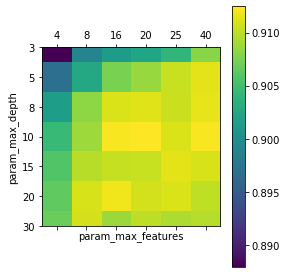

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.matshow(res_piv.values)
plt.xlabel(res_piv.columns.name)
plt.xticks(range(res_piv.shape[1]), res_piv.columns)
plt.ylabel(res_piv.index.name)
plt.yticks(range(res_piv.shape[0]), res_piv.index)
plt.colorbar()